# Getting started with INTEGRATE

This notebook contains a simple example of geeting started with INTEGRATE

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # #%load_ext autoreload
    # #%autoreload 2
    pass

In [2]:
import integrate as ig
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 25637.71it/s]

Saving prior model to PRIOR_CHI2_NF_3_log-uniform_N1000.h5


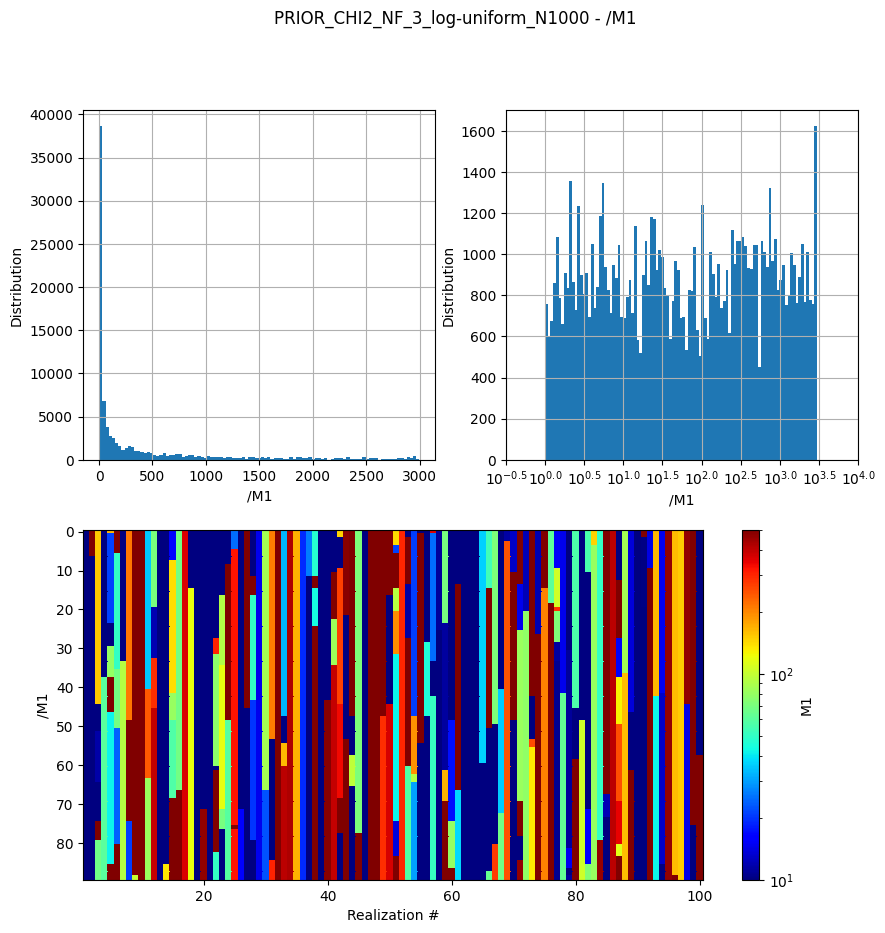

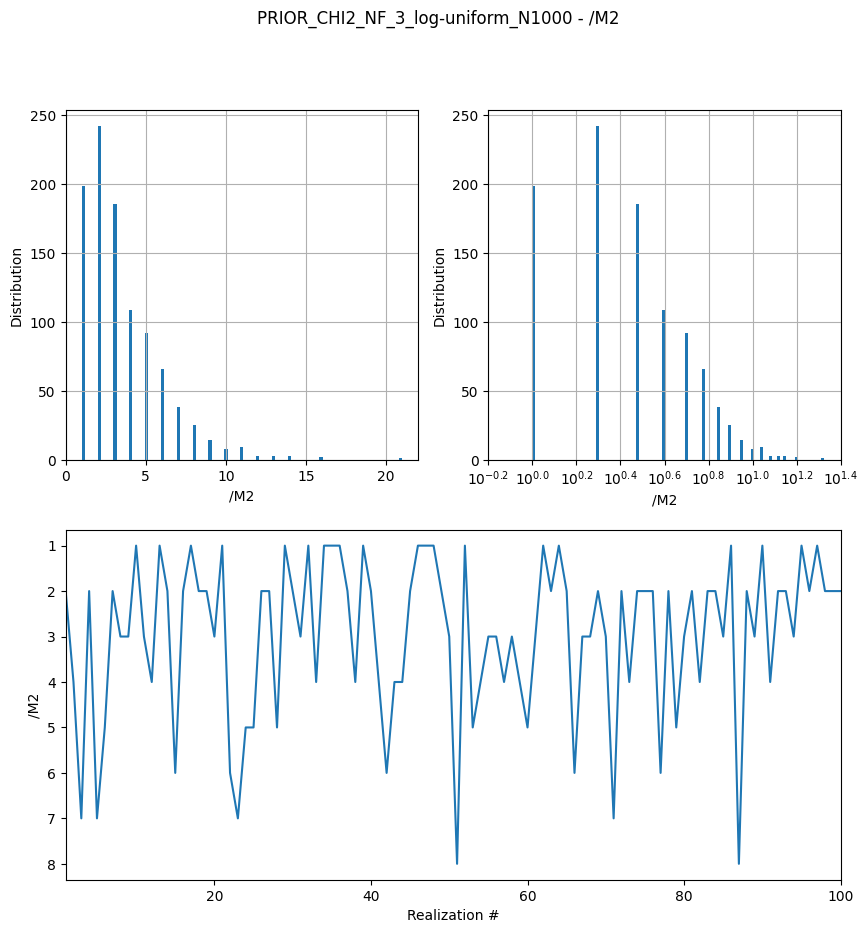

In [4]:
N=1000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=3000)

# Plot some summary statistics of the prior model
ig.plot_prior_stats(f_prior_h5)

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel)

N=1000, N_in=1000
Creating a copy of PRIOR_CHI2_NF_3_log-uniform_N1000.h5 as PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
Trying to copy PRIOR_CHI2_NF_3_log-uniform_N1000.h5 to PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:01<00:00, 12.31it/s]


Concatenating D_chunks
D.shape (1000, 40)
Time elapsed:   2.6 s, for 1000 soundings. 2.606 ms/sounding. 383.8it/s


## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [6]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   updatePostStat=False, 
                                   showInfo=1, 
                                   parallel=parallel)

Number of data points: 11693 (available), 11693 (used). Nchunks=32, Ncpu=32


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 366/366 [00:01<00:00, 362.92it/s]


T_av=339.1, Time=  1.4s/11693 soundings , 0.1ms/sounding, 8563.9it/s


In [7]:
ig.integrate_posterior_stats(f_post_h5)

Creating /M1/Mean in POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5
Creating /M1/Median in POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5
Creating /M1/Std in POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11693/11693 [00:12<00:00, 968.58it/s]


Creating /M2/Mean in POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5
Creating /M2/Median in POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5
Creating /M2/Std in POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N1000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu1000_aT1.h5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11693/11693 [00:01<00:00, 9334.15it/s]


### Plot some statistic from $\sigma(\mathbf{m})$

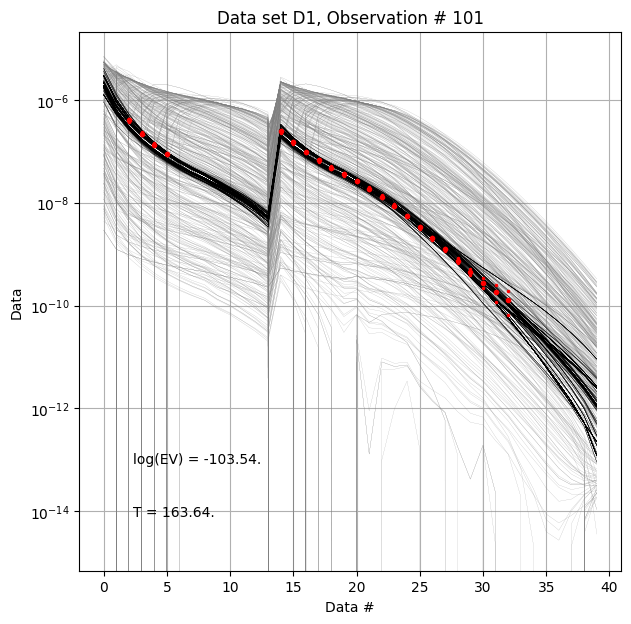

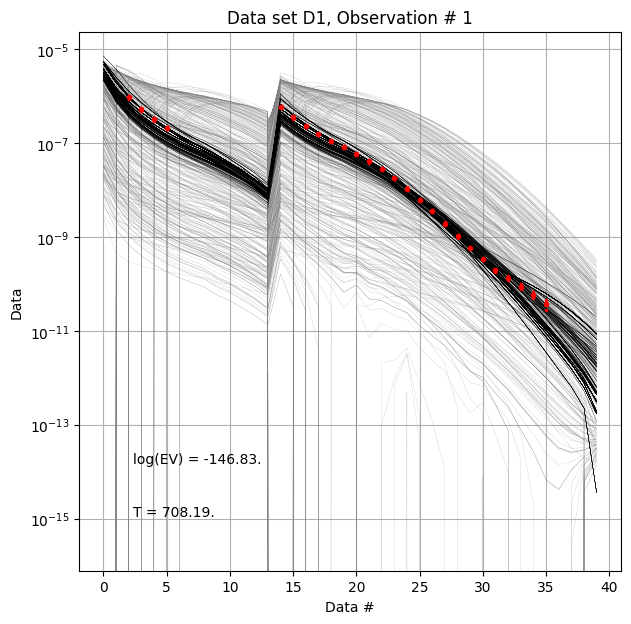

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100)
ig.plot_data_prior_post(f_post_h5, i_plot=0)

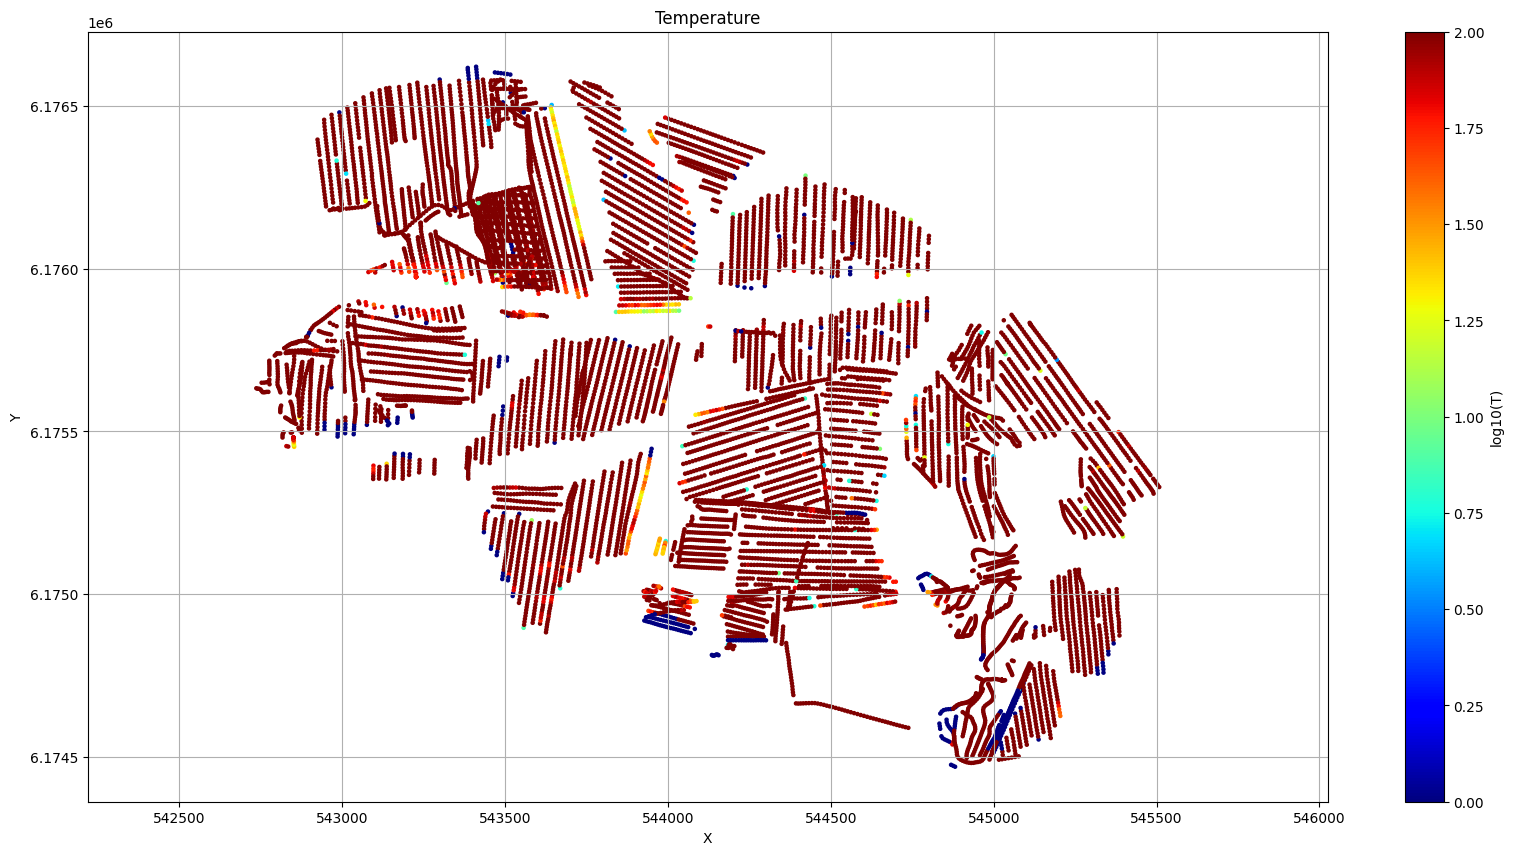

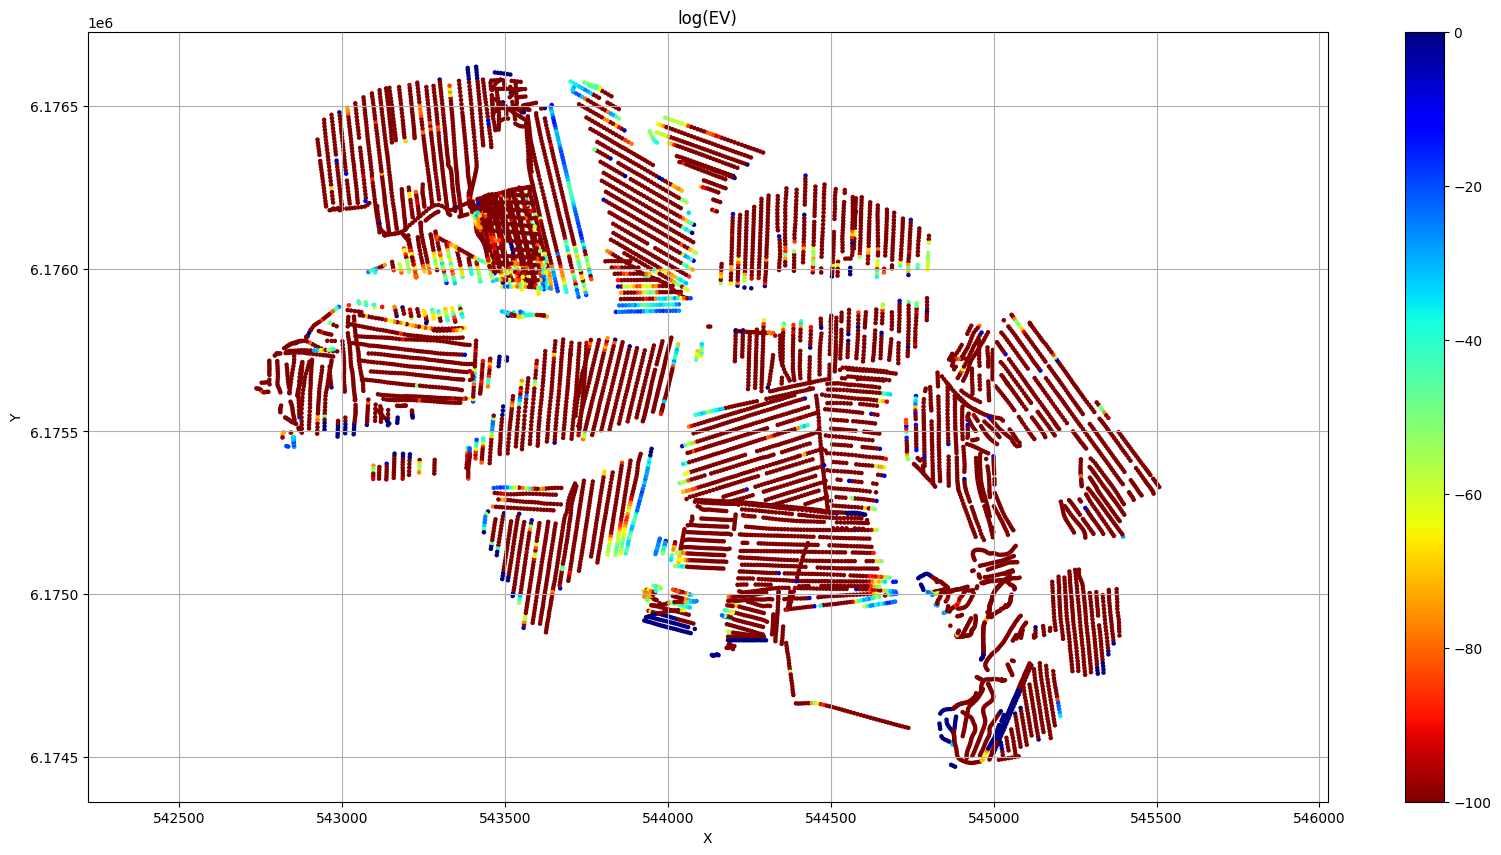

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T')
# Plot the evidnence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV')

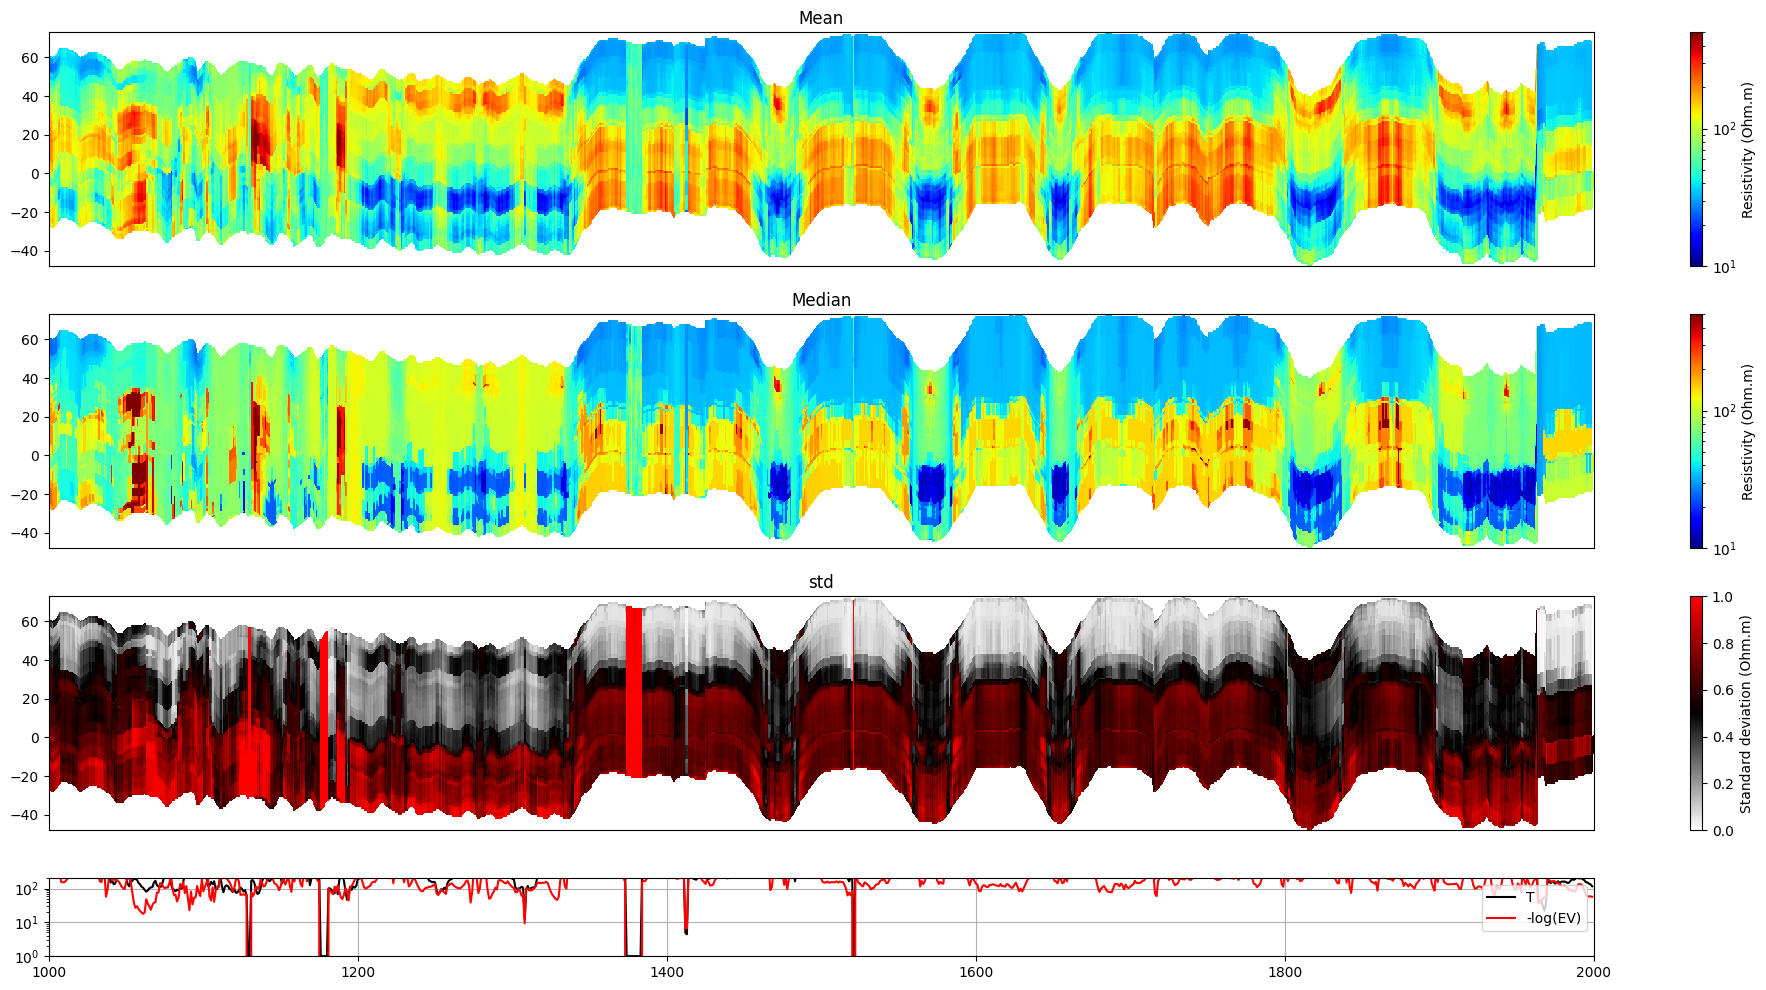

In [10]:
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1)

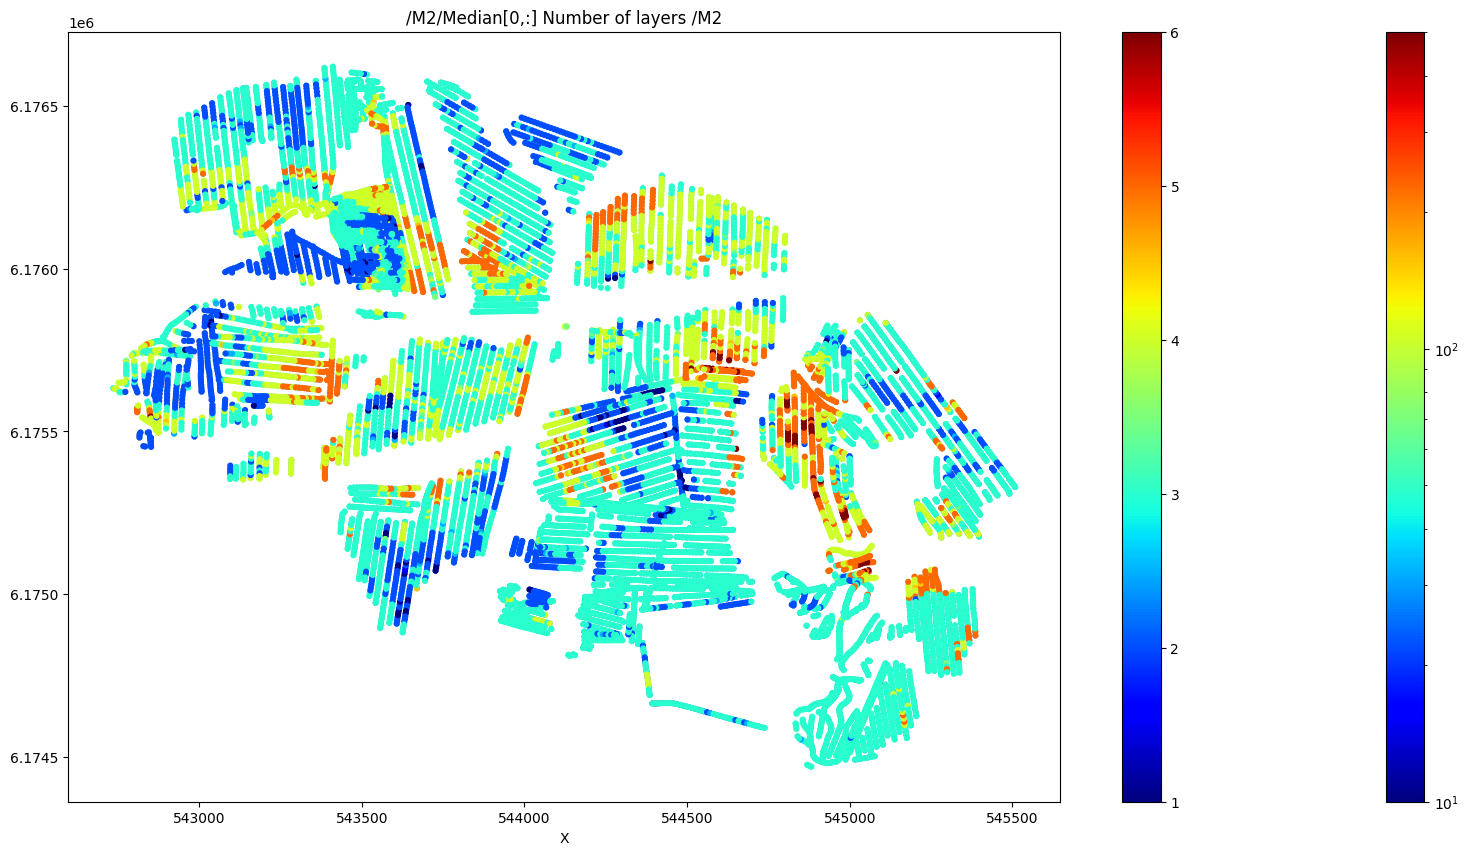

In [11]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=12, key='Median', uselog=1, cmap='jet', s=10)
#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Median', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=12)
except:
    pass